# Online Shoppers Intention

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

partial fit k-means

online classifier

batches

kanonika

In [1]:
import pandas as pd
import numpy
import river
from river import stream
from river import compose
from river import preprocessing
from river import evaluate
from river import metrics
from river import tree
from river import imblearn
from river import stats
import numbers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from datetime import timedelta
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from collections import Counter
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, precision_score, roc_auc_score, average_precision_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
from imblearn.under_sampling import NearMiss
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, balanced_accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.linear_model import SGDClassifier
from river import datasets, compose, linear_model, metrics
import random
from river import metrics
from river import linear_model, naive_bayes, tree
from river.datasets import Higgs
from river import metrics
from river import linear_model
from river import naive_bayes
from river import ensemble
from river import neighbors
from river import tree
from river import preprocessing
from river import compat
from river import imblearn
from river import optim
from sklearn.preprocessing import LabelEncoder
import warnings
from imblearn.over_sampling import RandomOverSampler

warnings.filterwarnings('ignore')

**Administrative:** This is the number of pages of this type (administrative) that the user visited.

**Administrative Duration:** This is the amount of time spent in this category of pages.

**Informational:** This is the number of pages of this type (informational) that the user visited.

**Informational Duration:** This is the amount of time spent in this category of pages.

**Product Related:** This is the number of pages of this type (product related) that the user visited.  

**Product Related Duration:** This is the amount of time spent in this category of pages.

**BounceRates:** Average bounce rate value of the pages visited by the visitor

**ExitRates:** Average exit rate value of the pages visited by the visitor

**PageValues:** Average page value of the pages visited by the visitor

**SpecialDay:** This value represents the closeness of the browsing date to special days or holidays

**Month:** Contains the month the pageview occurred, in string form.

**OperatingSystems:** An integer value representing the operating system that the user was on when viewing the page.

**Browser:** An integer value representing the browser that the user was using to view the page.

**Region:** An integer value representing which region the user is located in.

**TrafficType:** An integer value representing what type of traffic the user is categorized into.

**VisitorType:** A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

**Weekend:** A boolean representing whether the session is on a weekend.

**Revenue:** A boolean representing whether or not the user completed the purchase.

In [6]:
df=pd.read_csv('online_shoppers_intention.csv')

## EDA ##

In [13]:
# set the maximum number of columns to display to None
pd.set_option('display.max_columns', None)

# display the entire DataFrame without the need to move the horizontal scroll bar
display(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [6]:
df.describe(percentiles=[.01, .25, .50, .75, .95, .99])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.001250,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
95%,9.000000,348.266369,3.000000,195.000000,109.000000,4300.289077,0.200000,0.200000,38.160528,0.600000,3.000000,5.000000,8.000000,13.000000
99%,14.000000,830.587041,6.000000,716.390000,221.000000,8701.142697,0.200000,0.200000,85.498490,1.000000,4.000000,10.000000,9.000000,20.000000


In [7]:
# Check for missing values
missing_values = df.isna().sum()
missing_values = df.isnull().sum()
print(missing_values)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [32]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

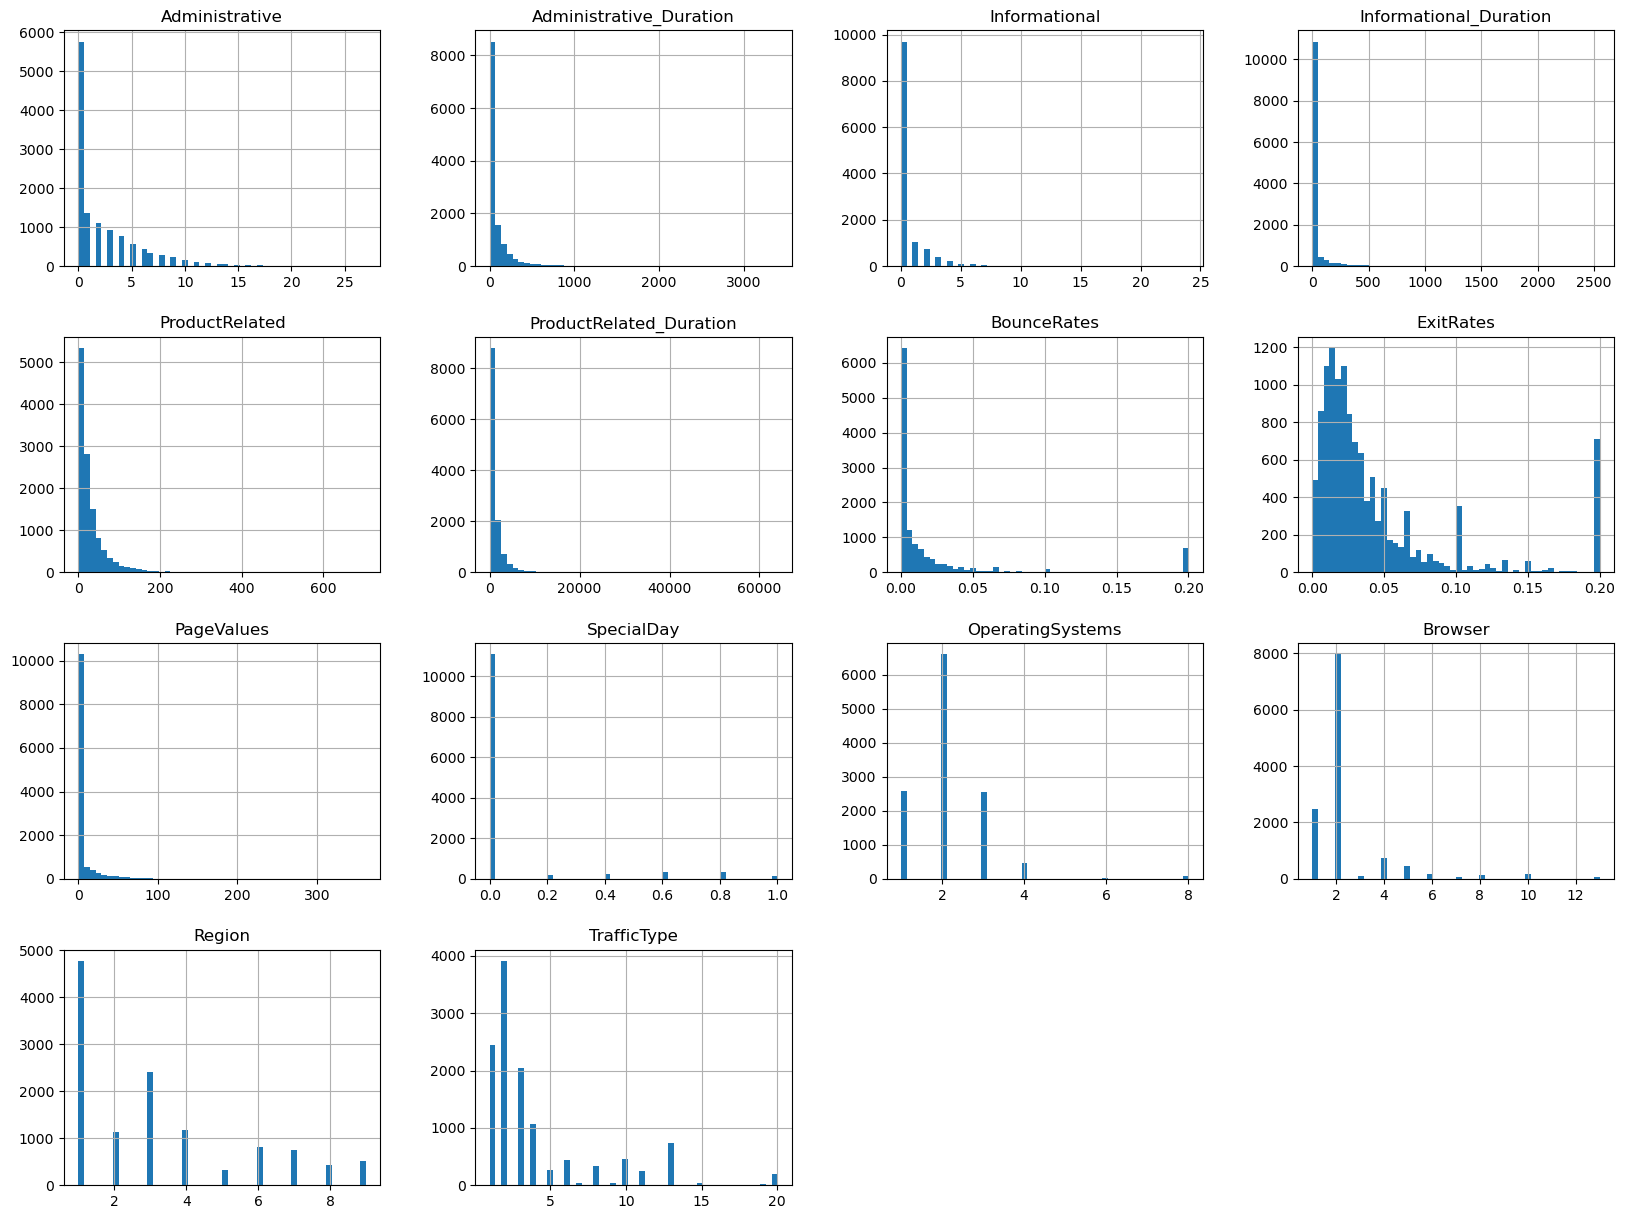

In [8]:
# since all the data are numeric, see the distribution
df.hist(bins=50,figsize=(20,15))
plt.show()

In [9]:
def plot_data_count(df, col, return_pct_share=True, hue=None, figsize=(8,4)):
    
    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue=hue,palette='flare')
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=9)
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)
    
    plt.show()
    
    if return_pct_share:
        print("\n")
        print("Percent share for each category:")
        print(df[col].value_counts(normalize=True)*100)

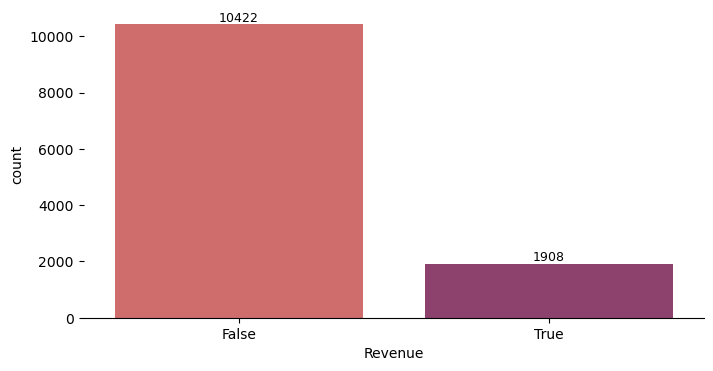



Percent share for each category:
False    84.525547
True     15.474453
Name: Revenue, dtype: float64


In [10]:
plot_data_count(df,'Revenue')

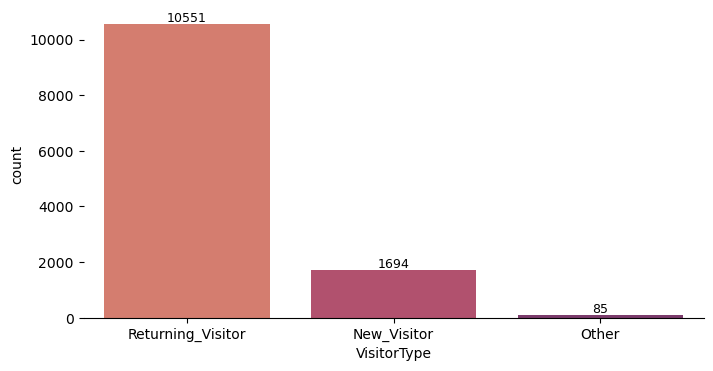



Percent share for each category:
Returning_Visitor    85.571776
New_Visitor          13.738848
Other                 0.689376
Name: VisitorType, dtype: float64


In [11]:
plot_data_count(df,'VisitorType')

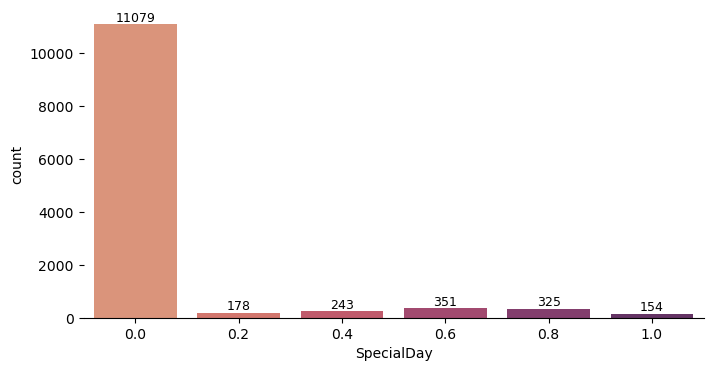



Percent share for each category:
0.0    89.854015
0.6     2.846715
0.8     2.635848
0.4     1.970803
0.2     1.443633
1.0     1.248986
Name: SpecialDay, dtype: float64


In [12]:
plot_data_count(df, 'SpecialDay')

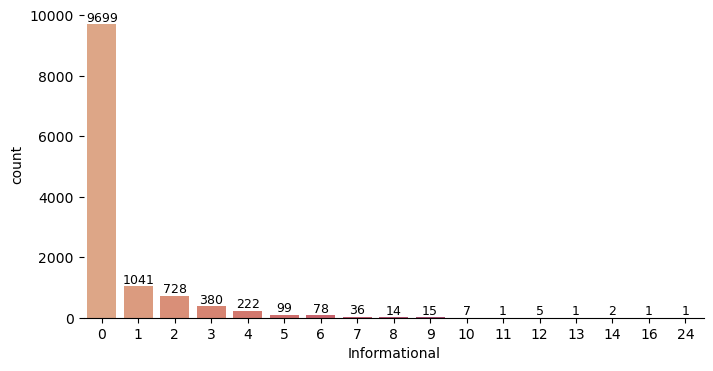



Percent share for each category:
0     78.661800
1      8.442822
2      5.904298
3      3.081914
4      1.800487
5      0.802920
6      0.632603
7      0.291971
9      0.121655
8      0.113544
10     0.056772
12     0.040552
14     0.016221
16     0.008110
11     0.008110
24     0.008110
13     0.008110
Name: Informational, dtype: float64


In [13]:
plot_data_count(df, 'Informational')

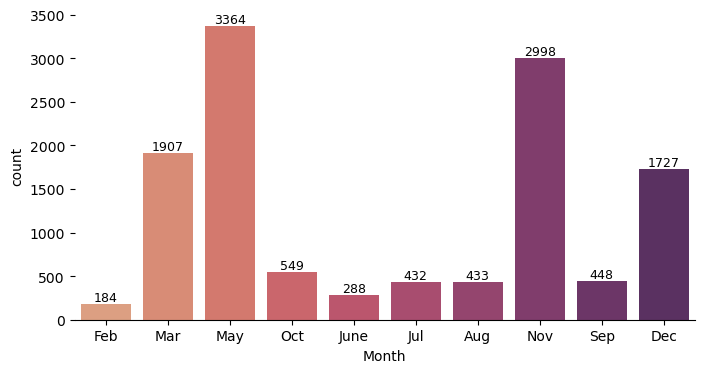



Percent share for each category:
May     27.283049
Nov     24.314680
Mar     15.466342
Dec     14.006488
Oct      4.452555
Sep      3.633414
Aug      3.511760
Jul      3.503650
June     2.335766
Feb      1.492295
Name: Month, dtype: float64


In [14]:
plot_data_count(df, 'Month')

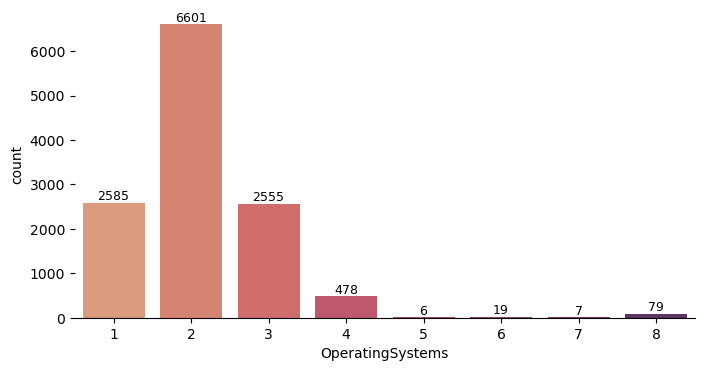



Percent share for each category:
2    53.536091
1    20.965126
3    20.721817
4     3.876723
8     0.640714
6     0.154096
7     0.056772
5     0.048662
Name: OperatingSystems, dtype: float64


In [15]:
plot_data_count(df, 'OperatingSystems')

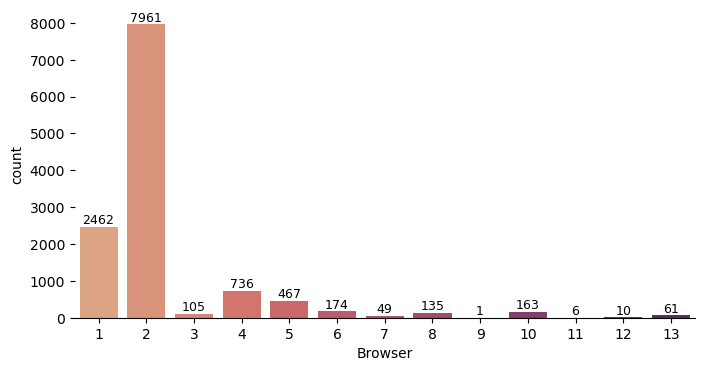



Percent share for each category:
2     64.566099
1     19.967559
4      5.969181
5      3.787510
6      1.411192
10     1.321979
8      1.094891
3      0.851582
13     0.494728
7      0.397405
12     0.081103
11     0.048662
9      0.008110
Name: Browser, dtype: float64


In [16]:
plot_data_count(df, 'Browser')

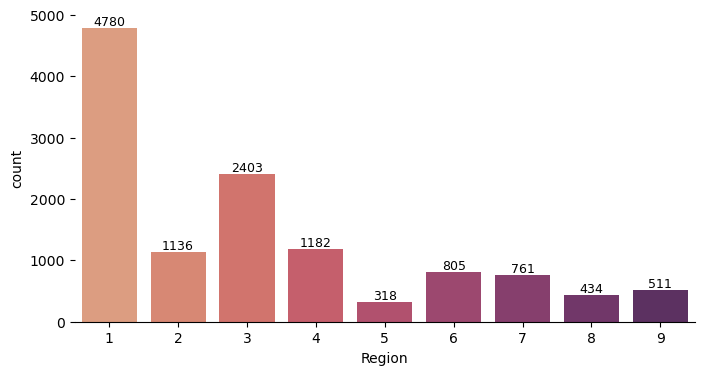



Percent share for each category:
1    38.767234
3    19.489051
4     9.586375
2     9.213301
6     6.528792
7     6.171938
9     4.144363
8     3.519870
5     2.579075
Name: Region, dtype: float64


In [17]:
plot_data_count(df, 'Region')

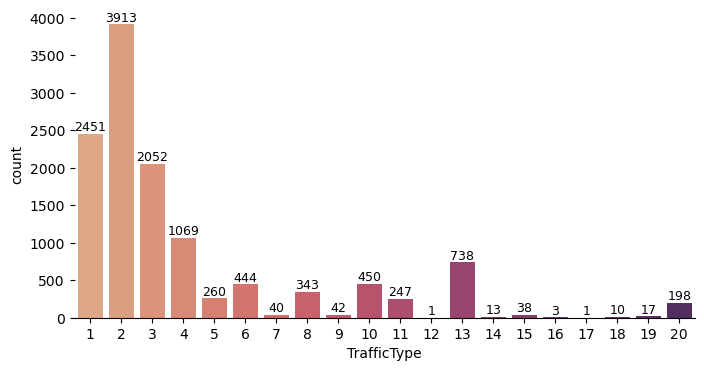



Percent share for each category:
2     31.735604
1     19.878345
3     16.642336
4      8.669911
13     5.985401
10     3.649635
6      3.600973
8      2.781833
5      2.108678
11     2.003244
20     1.605839
9      0.340633
7      0.324412
15     0.308191
19     0.137875
14     0.105434
18     0.081103
16     0.024331
12     0.008110
17     0.008110
Name: TrafficType, dtype: float64


In [18]:
plot_data_count(df,'TrafficType')

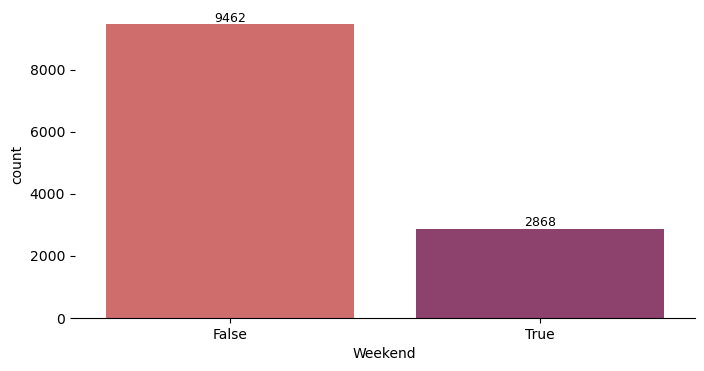



Percent share for each category:
False    76.739659
True     23.260341
Name: Weekend, dtype: float64


In [19]:
plot_data_count(df,'Weekend')

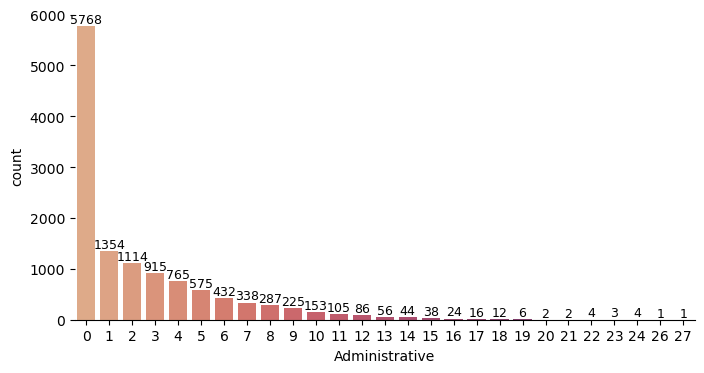



Percent share for each category:
0     46.780211
1     10.981346
2      9.034874
3      7.420925
4      6.204380
5      4.663423
6      3.503650
7      2.741281
8      2.327656
9      1.824818
10     1.240876
11     0.851582
12     0.697486
13     0.454177
14     0.356853
15     0.308191
16     0.194647
17     0.129765
18     0.097324
19     0.048662
24     0.032441
22     0.032441
23     0.024331
21     0.016221
20     0.016221
27     0.008110
26     0.008110
Name: Administrative, dtype: float64


In [20]:
plot_data_count(df, 'Administrative')

### Continious variables

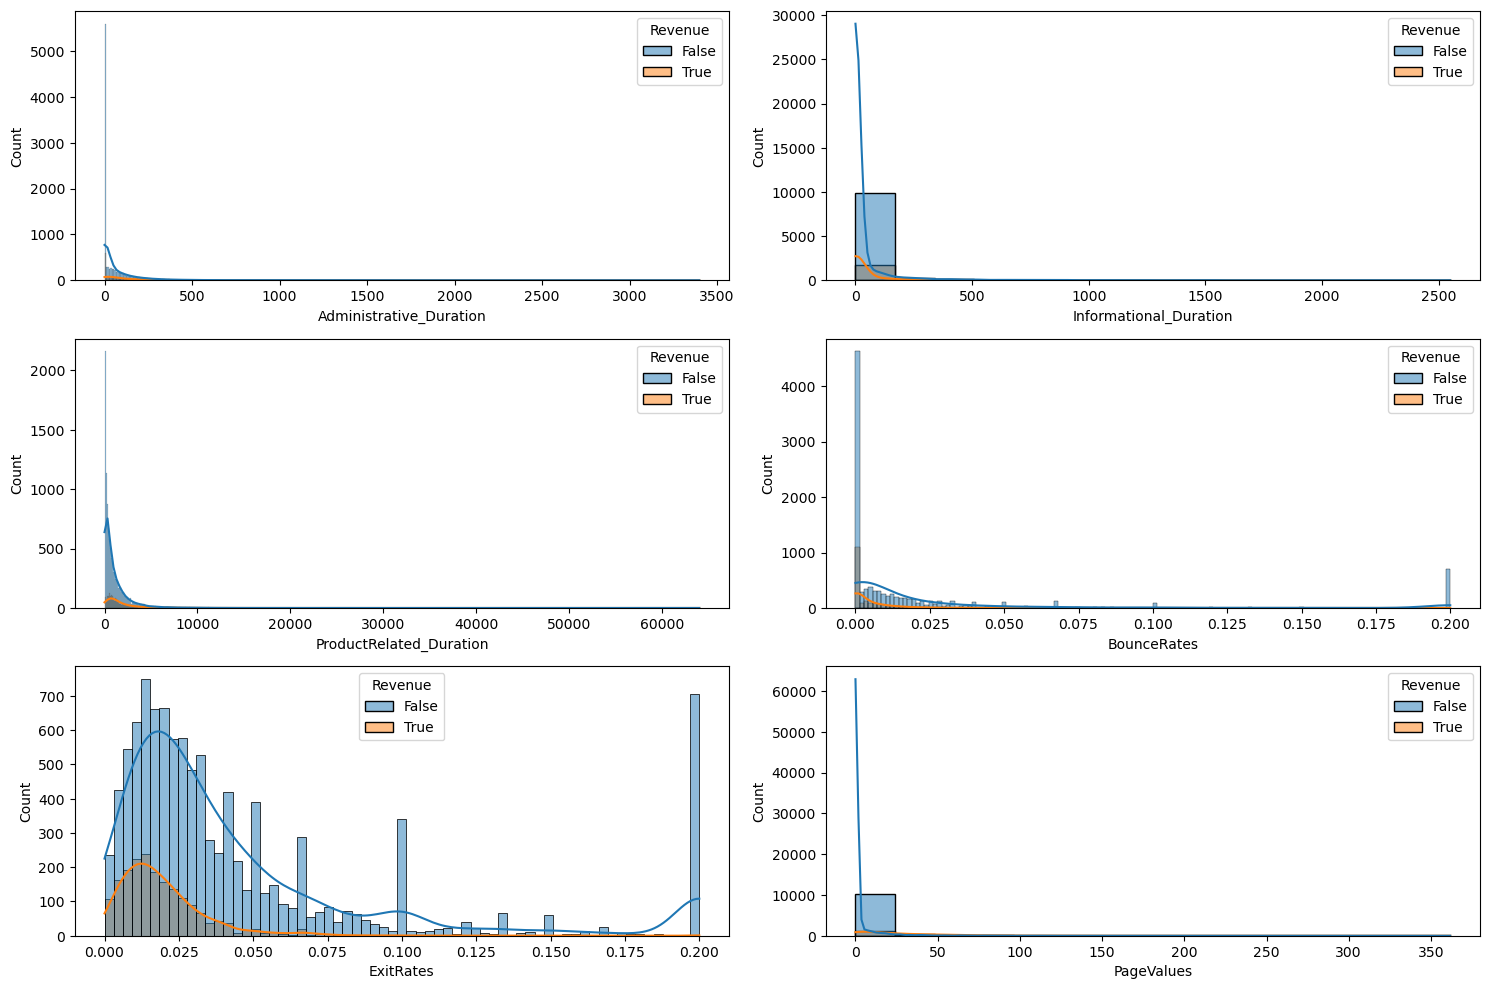

In [4]:
# select the continuous columns
continuous_features = ['Administrative_Duration', 
                       'Informational_Duration', 
                       'ProductRelated_Duration', 
                       'BounceRates', 
                       'ExitRates', 
                       'PageValues']
hue_var = 'Revenue'

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
#fig.delaxes(ax= axs[3,0]) 
axs = np.ravel(axs)

for i, col in enumerate(continuous_features):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, hue=hue_var, ax=axs[i])

plt.tight_layout()
plt.show()

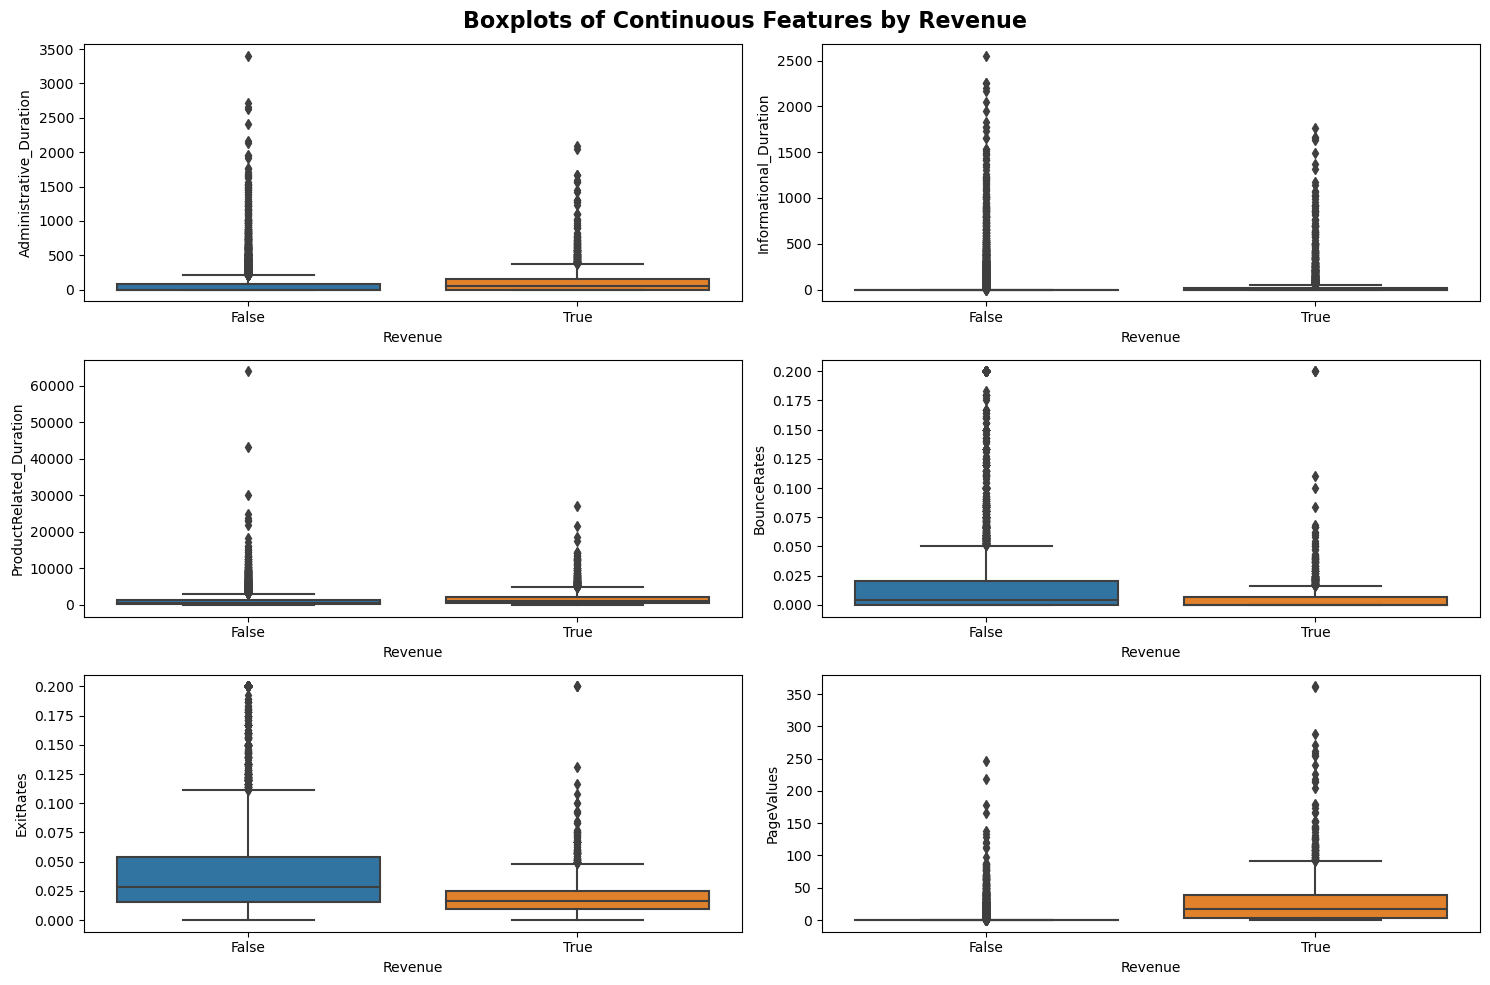

<Figure size 640x480 with 0 Axes>

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
#fig.delaxes(ax= axs[3,1]) 
axs = np.ravel(axs)

for i, col in enumerate(continuous_features):
    plt.sca(axs[i])
    sns.boxplot(data=df, x='Revenue', y=col)

plt.suptitle('Boxplots of Continuous Features by Revenue', fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()
plt.savefig('continuous_boxplots.png')

### Non Continious variables

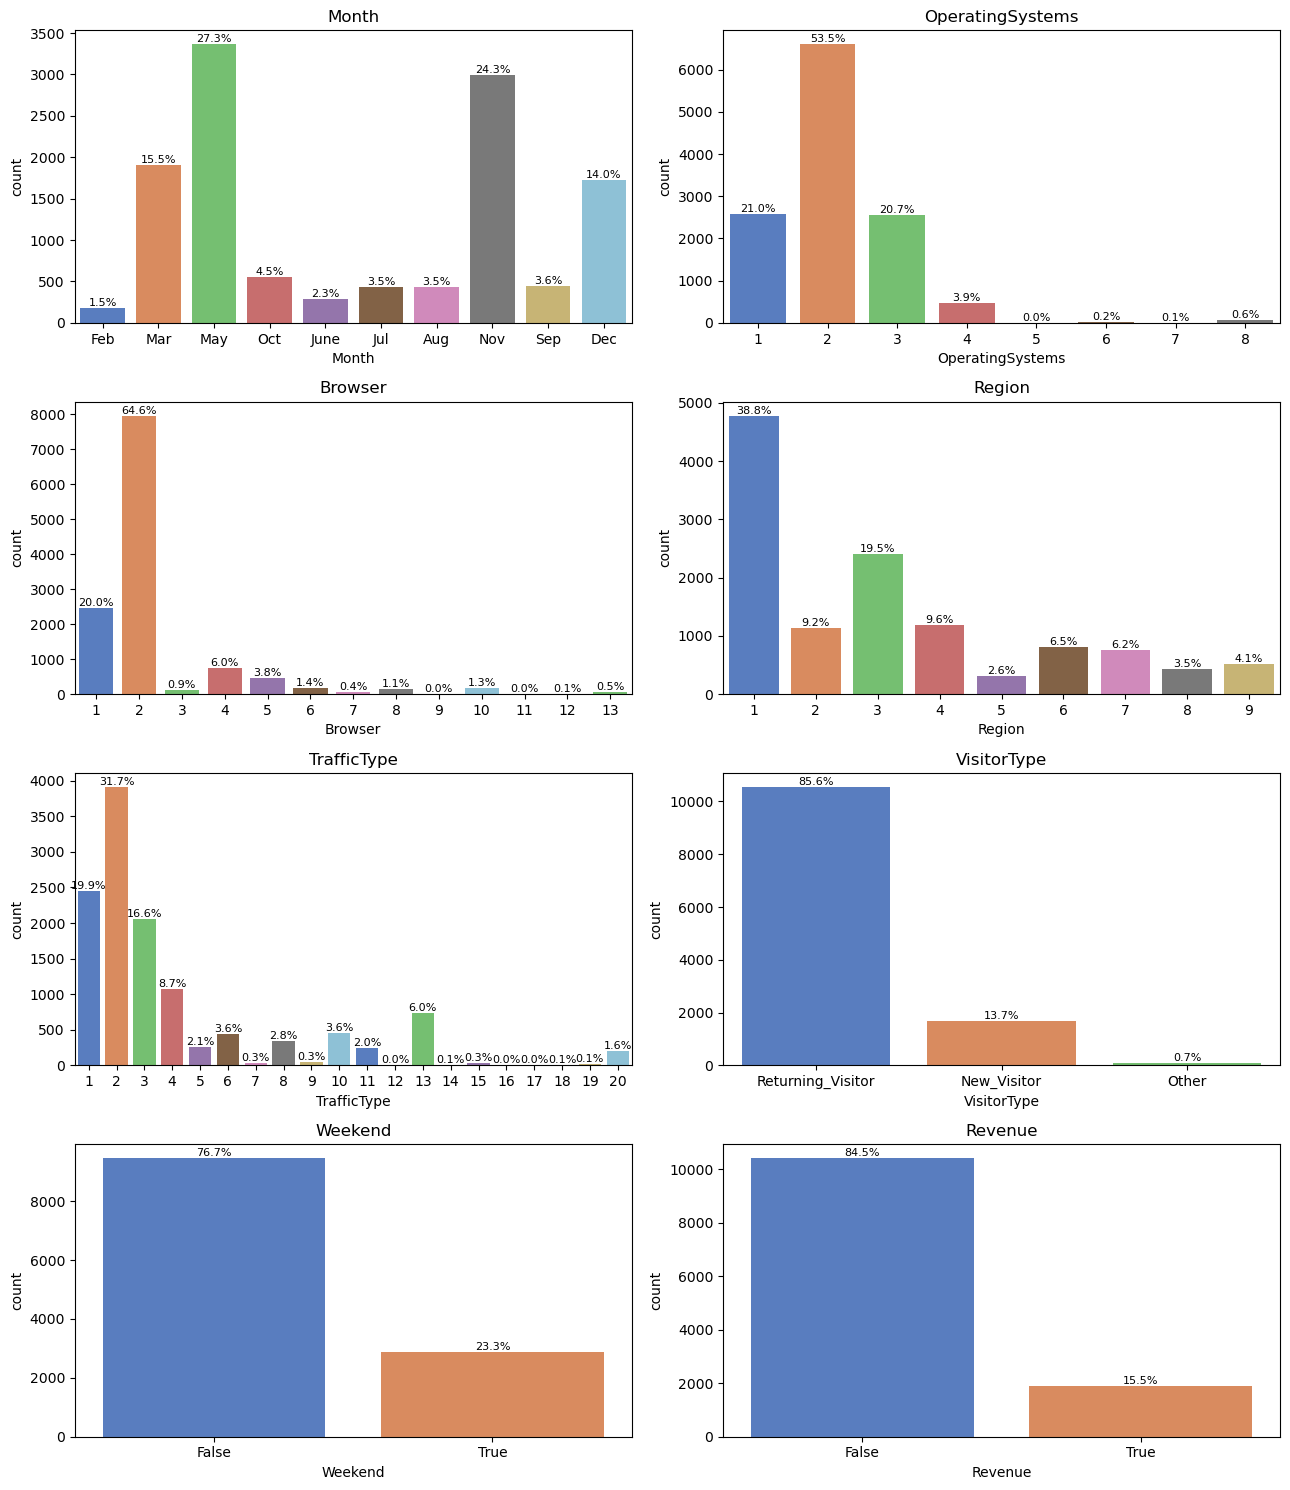

In [7]:
# select the non-continuous columns
non_continuous_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

# create subplots for the barplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(13, 15))

# iterate over the columns and create a barplot for each column in a separate subplot
for ax, col in zip(axes.flatten(), non_continuous_cols):
    sns.countplot(data=df, x=col, ax=ax,palette='muted')
    ax.set_title(col)

    # add percentage text to each bar
    total = len(df)
    for p in ax.patches:
        percentage = p.get_height() / total * 100
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{percentage:.1f}%', (x, y), ha='center', va='bottom',fontsize=8)

# adjust the layout of the subplots and display the plot
plt.tight_layout()
plt.show()

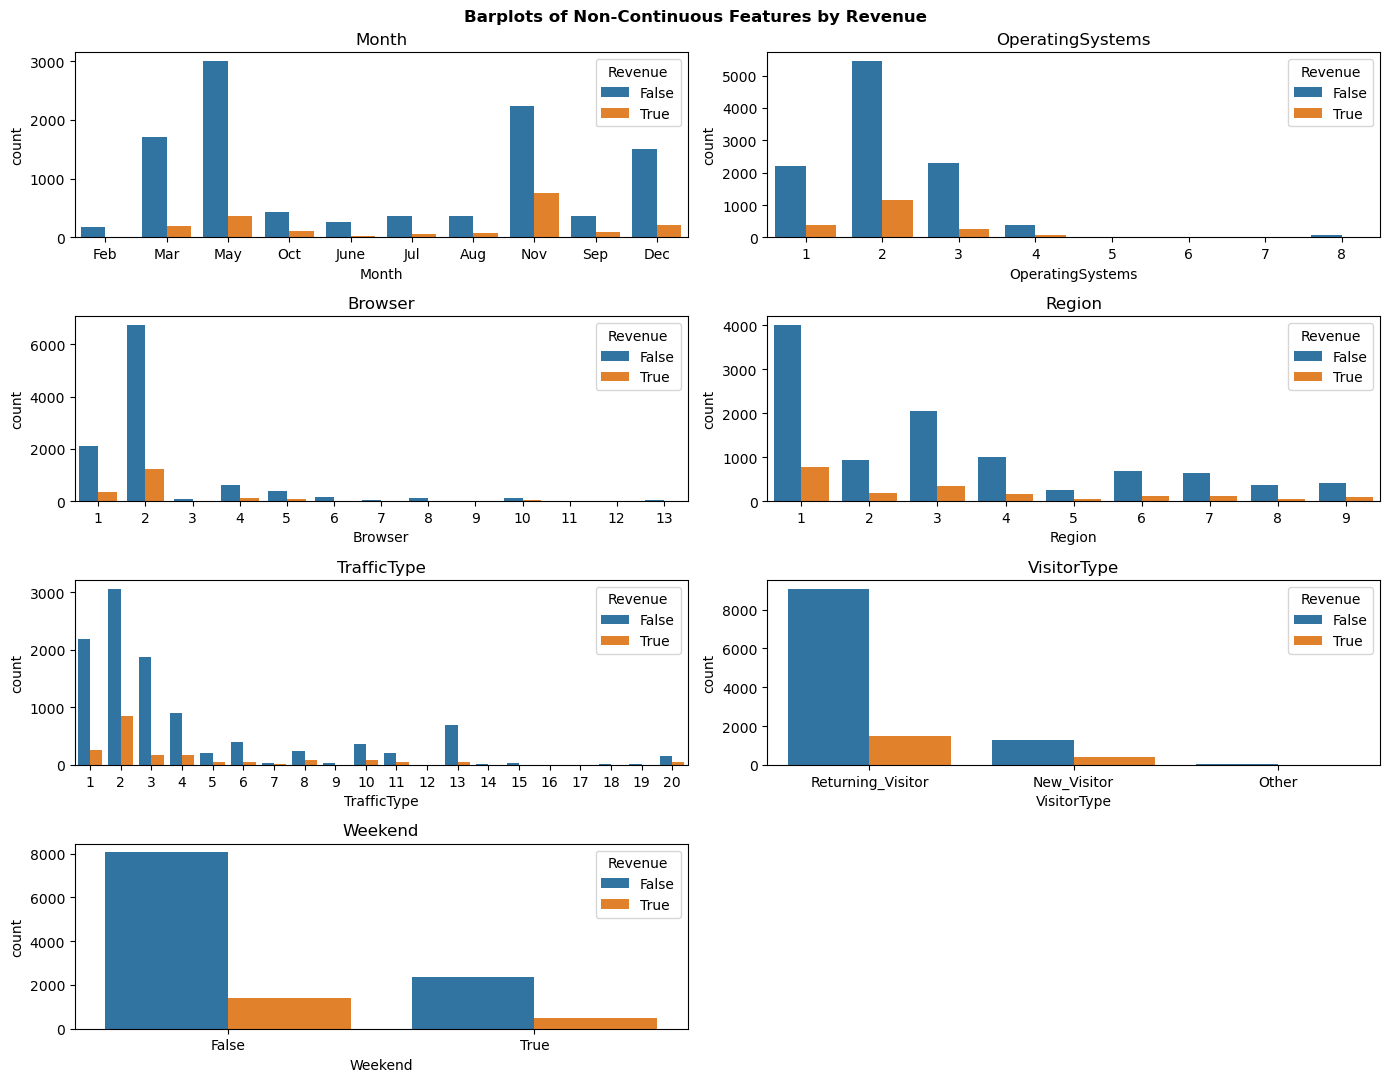

In [34]:

# select the non-continuous columns
non_continuous_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

# create subplots for the barplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 11))

# This line will delete the last empty plot
fig.delaxes(ax= axes[3,1]) 

# iterate over the columns and create a barplot for each column in a separate subplot
for ax, col in zip(axes.flatten(), non_continuous_cols):
    sns.countplot(data=df, x=col, hue='Revenue', ax=ax)
    ax.set_title(col)

    # add legend
    ax.legend(title='Revenue', loc='upper right')

plt.suptitle('Barplots of Non-Continuous Features by Revenue', fontsize=12,fontweight='bold')
# adjust the layout of the subplots and display the plot
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Correlations Matrix'}>

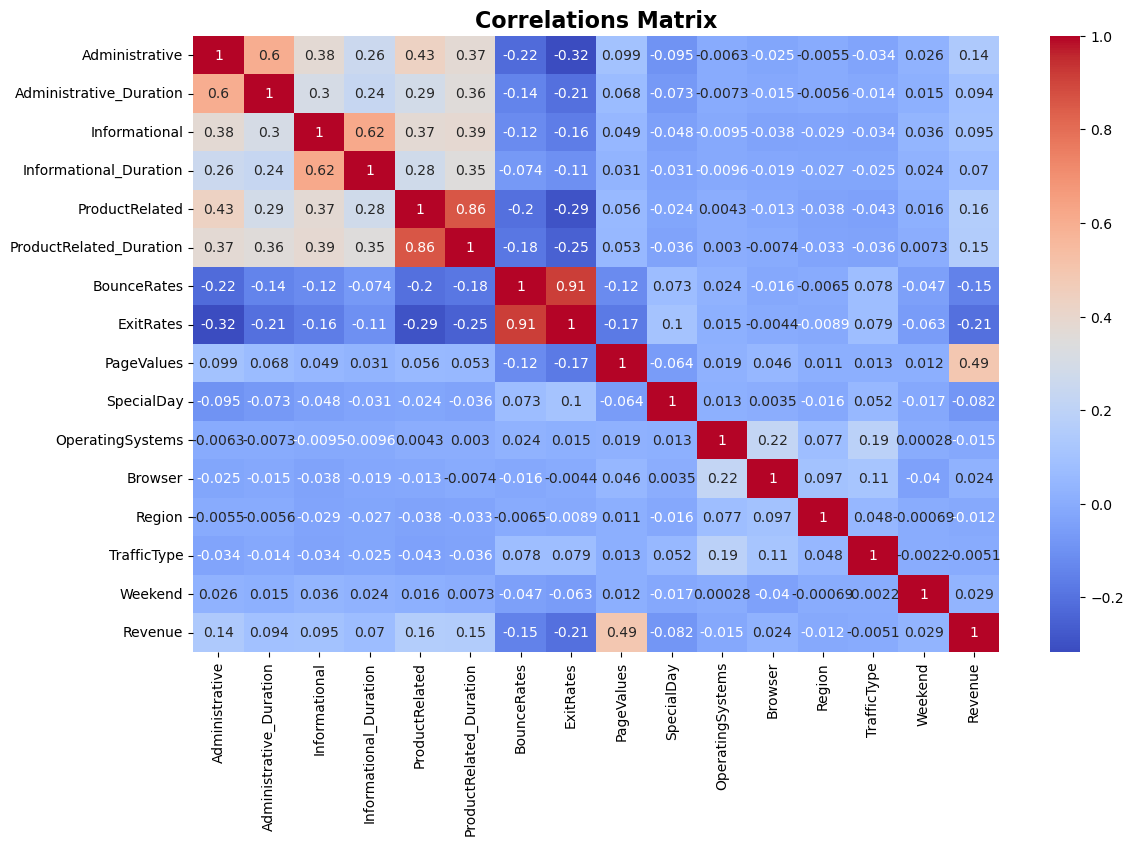

In [17]:
Var_Corr = df.corr()
fig, ax = plt.subplots(figsize=(13,8))  
plt.title('Correlations Matrix',size=16,fontweight='bold')
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, cmap='coolwarm')

In [29]:
#df.to_csv('online_shoppers_intention_cleaning.csv')

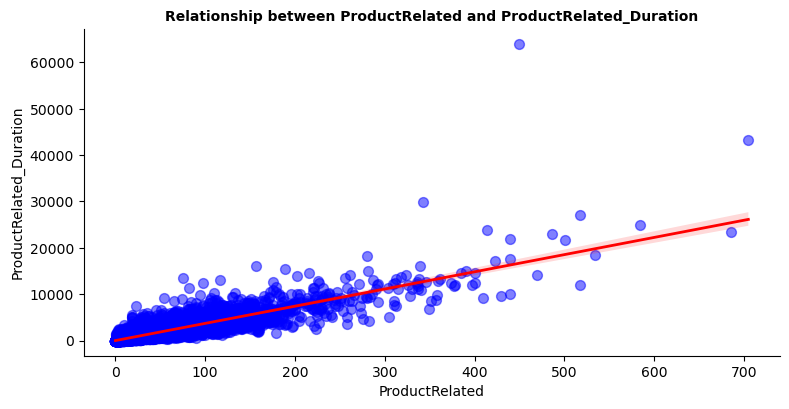

In [20]:
# create a lmplot with custom size and style
sns.lmplot(x="ProductRelated", y="ProductRelated_Duration", data=df, height=4, aspect=2,
           scatter_kws={'alpha':0.5, 'color':'blue', 's':50},
           line_kws={'linewidth':2, 'color':'red'})

# set the axis labels and title
plt.xlabel("ProductRelated")
plt.ylabel("ProductRelated_Duration")
plt.title('Relationship between ProductRelated and ProductRelated_Duration',fontweight='bold',size=10)

# display the plot
plt.show()

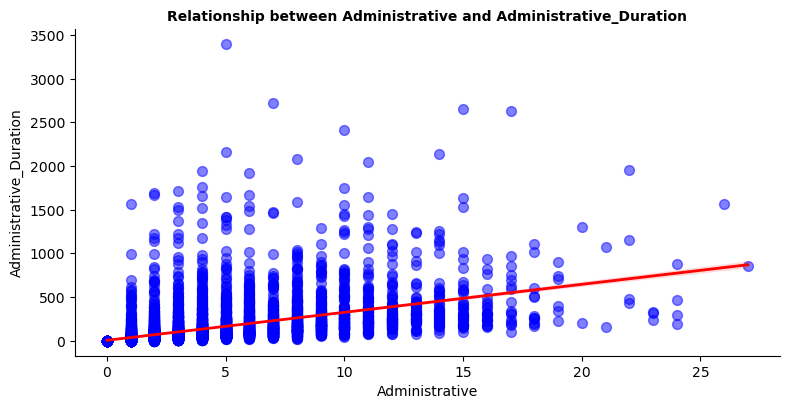

In [26]:
# create a lmplot with custom size and style
sns.lmplot(x="Administrative", y="Administrative_Duration", data=df, height=4, aspect=2,
           scatter_kws={'alpha':0.5, 'color':'blue', 's':50},
           line_kws={'linewidth':2, 'color':'red'})

# set the axis labels and title
plt.title('Relationship between Administrative and Administrative_Duration',fontweight='bold',size=10)
plt.xlabel("Administrative")
plt.ylabel("Administrative_Duration")
#plt.title("")

# display the plot
plt.show()

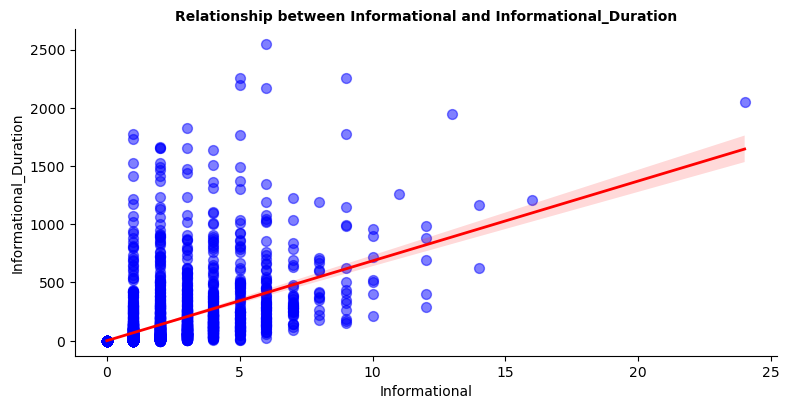

In [27]:
# create a lmplot with custom size and style
sns.lmplot(x="Informational", y="Informational_Duration", data=df, height=4, aspect=2,
           scatter_kws={'alpha':0.5, 'color':'blue', 's':50},
           line_kws={'linewidth':2, 'color':'red'})

# set the axis labels and title
plt.title('Relationship between Informational and Informational_Duration',fontweight='bold',size=10)
plt.xlabel("Informational")
plt.ylabel("Informational_Duration")


# display the plot
plt.show()

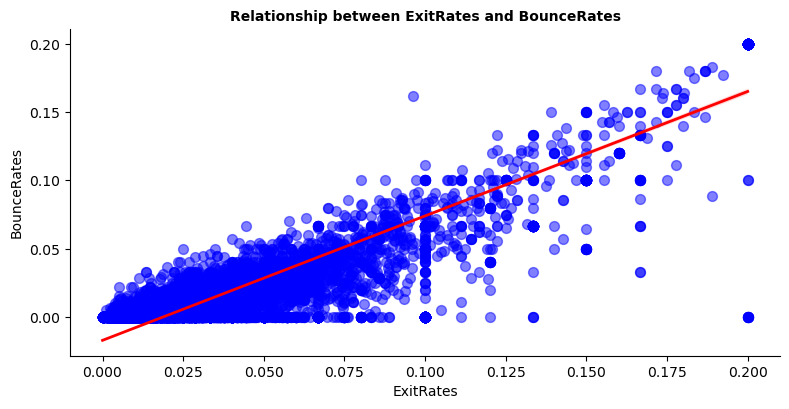

In [28]:
# create a lmplot with custom size and style
sns.lmplot(x="ExitRates", y="BounceRates", data=df, height=4, aspect=2,
           scatter_kws={'alpha':0.5, 'color':'blue', 's':50},
           line_kws={'linewidth':2, 'color':'red'})

# set the axis labels and title
plt.title('Relationship between ExitRates and BounceRates',fontweight='bold',size=10)
plt.xlabel("ExitRates")
plt.ylabel("BounceRates")
#plt.title("")

# display the plot
plt.show()

## Encoding

In [6]:
Month={'Feb':2, 'Mar':3, 'May':5,  'June':6,'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df['Month']=df['Month'].map(Month)

VisitorType={'Returning_Visitor':0, 'New_Visitor':1, 'Other':2}
df['VisitorType']=df['VisitorType'].map(VisitorType)
d={True:1,False:0}
df['Weekend']=df['Weekend'].map(d)
df['Revenue']=df['Revenue'].map(d)

## Train - Test

With stratify to keep the ratio.

In [7]:
# split the DataFrame into training and test sets with 80% for training and 20% for testing
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42,stratify=df['Revenue'])

# assign the 'Revenue' column as the label for both sets
train_label = X_train['Revenue']
test_label = X_test['Revenue']

# remove the 'Revenue' column from both sets
X_train = X_train.drop('Revenue', axis=1)
X_test = X_test.drop('Revenue', axis=1)

# display the shapes of the resulting sets
print(f"Training set shape: {X_train.shape}, label shape: {train_label.shape}")
print(f"Test set shape: {X_test.shape}, label shape: {test_label.shape}")

Training set shape: (9864, 17), label shape: (9864,)
Test set shape: (2466, 17), label shape: (2466,)


In [180]:
train_label.value_counts()

0    8338
1    1526
Name: Revenue, dtype: int64

In [184]:
print('Percentage of revenue in train:',1526/(1526+8338))

Percentage of revenue in train: 0.15470397404703973


In [182]:
test_label.value_counts()

0    2084
1     382
Name: Revenue, dtype: int64

In [185]:
print('Percentage of revenue in train:',382/(382+2084))

Percentage of revenue in train: 0.1549067315490673


## Train a Baseline Classifier

In [8]:
def train_and_evaluate_model(model_name,train_set,test_set,train_label):
    model = model_name(random_state=42)
    model.fit(train_set, train_label)  
    
    y_pred = model.predict(test_set)    # make predictions on the test set
    accuracy = accuracy_score(test_label, y_pred) # calculate accuracy score
    cm = confusion_matrix(test_label, y_pred) # calculate confusion matrix
    recall = recall_score(test_label, y_pred > 0.5)
    precision = precision_score(test_label, y_pred > 0.5)
    auc = roc_auc_score(test_label, y_pred)
    auc_pr = average_precision_score(test_label, y_pred)
    f1 = f1_score(test_label, y_pred > 0.5)
    # Calculate the balanced accuracy of the classifier
    balanced_acc = balanced_accuracy_score(test_label, y_pred)

    print('Accuracy:', accuracy) # print accuracy 
    print('Confusion Matrix:')
    print(cm)  # print the confusion matrix                                  
    print('Predicted Labels:', y_pred)  # print the predicted labels
    print("recal:",recall) # Compute recall
    print("precision:",precision) # Compute precision
    print("ROC AUC:",auc) # Compute AUC
    print("AUC-PR:",auc_pr) # Compute AUC-PR
    print("F1:",f1) # Compute F1 score
    print('Balanced accuracy:', balanced_acc)   

In [9]:
train_and_evaluate_model(LogisticRegression,X_train,X_test,train_label)

Accuracy: 0.8795620437956204
Confusion Matrix:
[[2028   56]
 [ 241  141]]
Predicted Labels: [0 0 1 ... 0 0 0]
recal: 0.36910994764397903
precision: 0.7157360406091371
ROC AUC: 0.6711192732461737
AUC-PR: 0.3619144084534386
F1: 0.4870466321243523
Balanced accuracy: 0.6711192732461738


## Feature Selection with RF

Feature Importances:
                    Feature  Importance
0                PageValues    0.378358
1                 ExitRates    0.092940
2   ProductRelated_Duration    0.088626
3            ProductRelated    0.073322
4   Administrative_Duration    0.057682
5               BounceRates    0.057065
6            Administrative    0.042547
7                     Month    0.042303
8               TrafficType    0.031162
9                    Region    0.029897
10   Informational_Duration    0.027445
11                  Browser    0.019268
12         OperatingSystems    0.017980
13            Informational    0.016651
14              VisitorType    0.011194
15                  Weekend    0.010214
16               SpecialDay    0.003347


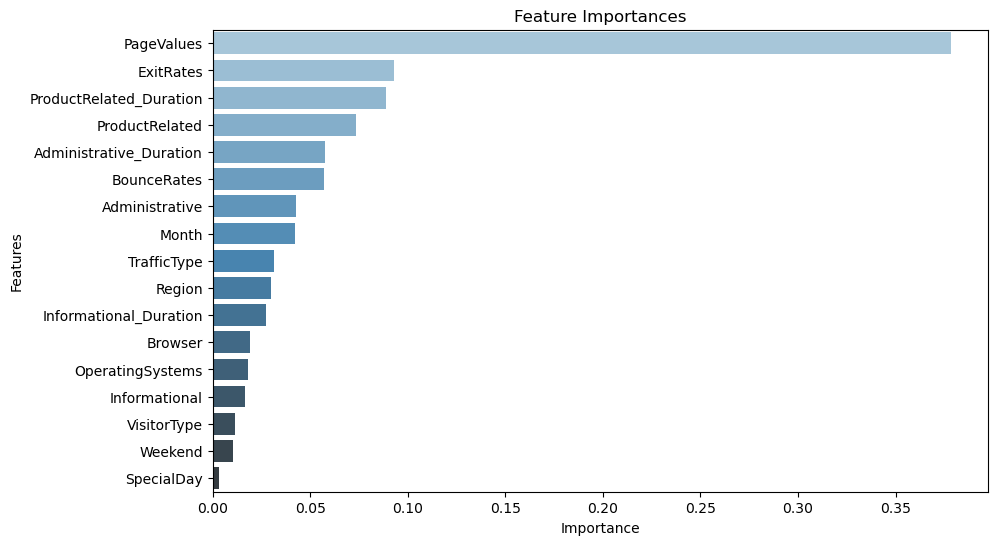

Wall time: 1.35 s


In [256]:
%%time

# create a random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the random forest classifier to the data
rfc.fit(X_train, train_label)

# create a pandas dataframe of feature importances
importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rfc.feature_importances_})

# sort the dataframe by importance in descending order
importances = importances.sort_values('Importance', ascending=False).reset_index(drop=True)

# print the feature importances
print('Feature Importances:')
print(importances)

# plot the feature importances using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='Blues_d')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Imbalance

### Undersampling

In [243]:
# Random Undesampling
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_res, y_res = rus.fit_resample(X_train, train_label)

In [244]:
train_and_evaluate_model(LogisticRegression,X_res,X_test,y_res)

Accuracy: 0.8548256285482563
Confusion Matrix:
[[1840  244]
 [ 114  268]]
Predicted Labels: [0 0 1 ... 1 0 0]
recal: 0.7015706806282722
precision: 0.5234375
ROC AUC: 0.7922440735195103
AUC-PR: 0.41345711360364834
F1: 0.5995525727069351
Balanced accuracy: 0.7922440735195104


### Oversampling

In [247]:
# Random Oversampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, train_label)

In [250]:
train_and_evaluate_model(LogisticRegression,X_res,X_test,y_res)

Accuracy: 0.8596918085969181
Confusion Matrix:
[[1847  237]
 [ 109  273]]
Predicted Labels: [0 0 1 ... 1 0 0]
recal: 0.7146596858638743
precision: 0.5352941176470588
ROC AUC: 0.8004680387092884
AUC-PR: 0.4267542614044382
F1: 0.6121076233183856
Balanced accuracy: 0.8004680387092884


### SMOTE

In [251]:
# SMOTE 
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, train_label)

In [252]:
train_and_evaluate_model(LogisticRegression,X_res,X_test,y_res)

Accuracy: 0.862124898621249
Confusion Matrix:
[[1871  213]
 [ 127  255]]
Predicted Labels: [0 0 1 ... 1 0 0]
recal: 0.6675392670157068
precision: 0.5448717948717948
ROC AUC: 0.7826659866748399
AUC-PR: 0.4152237240812545
F1: 0.5999999999999999
Balanced accuracy: 0.78266598667484


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

0    8960
2    2637
1     642
3      91
Name: cluster, dtype: int64


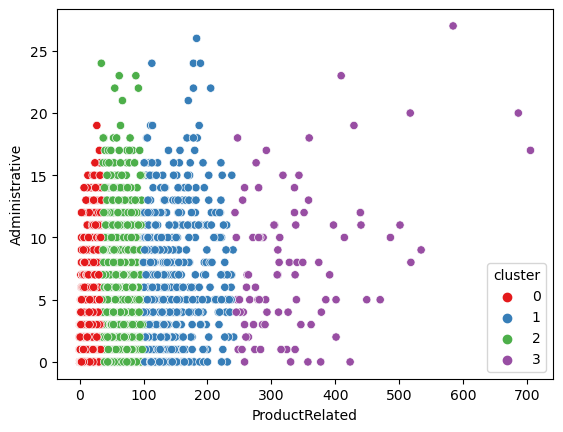

In [260]:
from sklearn.cluster import KMeans

# select the features to cluster on
features = ['ProductRelated', 'Administrative', 'Informational']

# create a KMeans object with k clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# fit the KMeans object to the data
kmeans.fit(df[features])

# add the cluster labels to the original dataframe
df['cluster'] = kmeans.labels_

# print the size of each cluster
print(df['cluster'].value_counts())

# plot the clusters using a scatterplot
sns.scatterplot(data=df, x='ProductRelated', y='Administrative', hue='cluster', palette='Set1')
plt.show()

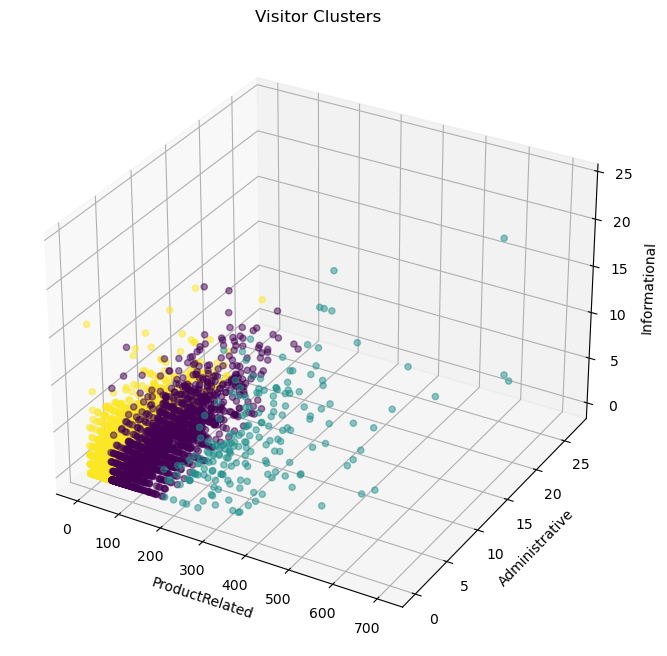

In [261]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# select the features to cluster on
features = ['ProductRelated', 'Administrative', 'Informational']

# create a KMeans object with k clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# fit the KMeans object to the data
kmeans.fit(df[features])

# add the cluster labels to the original dataframe
df['cluster'] = kmeans.labels_

# create a 3D scatterplot of the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['ProductRelated'], df['Administrative'], df['Informational'], c=df['cluster'], cmap='viridis', alpha=0.5)

# set the axis labels and title
ax.set_xlabel('ProductRelated')
ax.set_ylabel('Administrative')
ax.set_zlabel('Informational')
ax.set_title('Visitor Clusters')

# display the plot
plt.show()
